<a href="https://colab.research.google.com/github/AryaPulkit/Arima_Solar_energy_forecasting/blob/master/power_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Libraries

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
import math
import warnings
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ExcelR Placements/Climate Connect Intern/power_actual.csv')

In [0]:
data.shape

(70080, 5)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  70080 non-null  int64  
 1   datetime    70080 non-null  object 
 2   ghi         35040 non-null  float64
 3   gti         35040 non-null  float64
 4   power       70080 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.7+ MB


In [0]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [0]:
data.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [0]:
data.tail()

,Unnamed: 0,datetime,ghi,gti,power
70075,70075,2019-09-30 22:45:00,0.0,0.0,0.0
70076,70076,2019-09-30 23:00:00,0.0,0.0,0.0
70077,70077,2019-09-30 23:15:00,0.0,0.0,0.0
70078,70078,2019-09-30 23:30:00,0.0,0.0,0.0
70079,70079,2019-09-30 23:45:00,0.0,0.0,0.0


In [0]:
data.isna().sum()

Unnamed: 0        0
datetime          0
ghi           35040
gti           35040
power             0
dtype: int64

In [0]:
data['Date'] = data.datetime.dt.date
data['Date'] = pd.to_datetime(data['Date'])

In [0]:
data = data.groupby('Date').mean().reset_index()

In [0]:
data.drop(data.columns[[1,2,3]], axis = 1,inplace=True)

In [0]:
data.set_index('Date', inplace=True) #set date as index

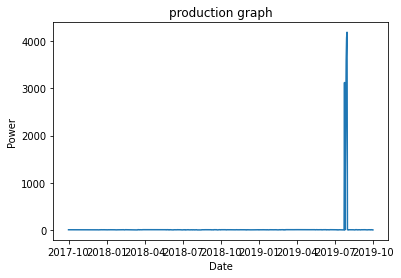

In [0]:
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("production graph")
plt.plot(data['power'])

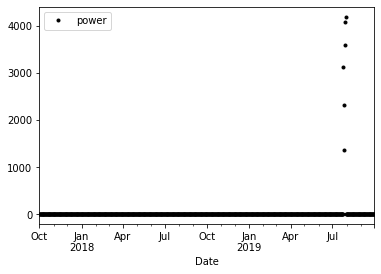

In [0]:
data.plot(style='k.')  #scatter_plot
plt.show()

(array([724.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   2.]),
 array([   0.        ,  418.86582292,  837.73164583, 1256.59746875,
        1675.46329167, 2094.32911458, 2513.1949375 , 2932.06076042,
        3350.92658333, 3769.79240625, 4188.65822917]),
 <a list of 10 Patch objects>)

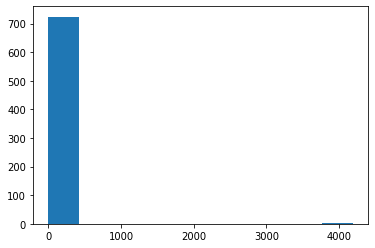

In [0]:
plt.hist(data.power) #histogram

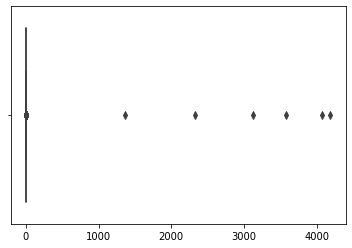

In [0]:
import seaborn as sns
sns.boxplot(data)

In [0]:
data.describe()

,power
count,730.000000
mean,28.612915
std,294.747072
min,0.000000
25%,2.623047
50%,3.446250
75%,4.063568
max,4188.658229


In [0]:
#dealing with Outlier
lower_bound= 0.1
upper_bound= 0.95
res = data.power.quantile([lower_bound,upper_bound])
res

0.10    0.000000
0.95    4.875708
Name: power, dtype: float64

In [0]:
true_index = (res.loc[lower_bound] < data.power.values) & (data.power.values < res.loc[upper_bound])
true_index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [0]:
false_index = ~true_index
false_index

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [0]:
data.power[true_index]

Date
2017-10-01    3.446250
2017-10-02    3.446250
2017-10-03    3.446250
2017-10-04    3.446250
2017-10-05    3.446250
                ...   
2019-09-23    3.709896
2019-09-25    3.328958
2019-09-26    3.470313
2019-09-27    4.216146
2019-09-29    2.631562
Name: power, Length: 614, dtype: float64

In [0]:
data.power[false_index]

Date
2017-12-31    0.0
2018-02-26    0.0
2018-02-27    0.0
2018-02-28    0.0
2018-03-01    0.0
             ... 
2019-09-14    0.0
2019-09-15    0.0
2019-09-24    0.0
2019-09-28    0.0
2019-09-30    0.0
Name: power, Length: 116, dtype: float64

In [0]:
mid = np.median(data.power[true_index])
mid

3.4462500000000005

In [0]:
data[false_index] = mid  #imputing outliers with median value.

In [0]:
data

,power
Date,
2017-10-01,3.446250
2017-10-02,3.446250
2017-10-03,3.446250
2017-10-04,3.446250
2017-10-05,3.446250
...,...
2019-09-26,3.470313
2019-09-27,4.216146
2019-09-28,3.446250


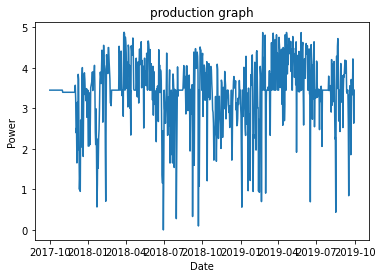

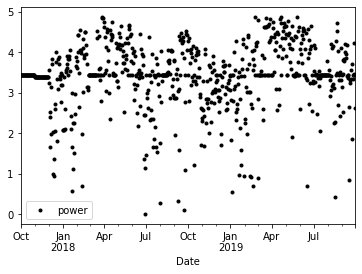

(array([  5.,  12.,   9.,  18.,  36.,  64., 132., 262., 120.,  72.]),
 array([6.65064103e-04, 4.87963141e-01, 9.75261218e-01, 1.46255929e+00,
        1.94985737e+00, 2.43715545e+00, 2.92445353e+00, 3.41175160e+00,
        3.89904968e+00, 4.38634776e+00, 4.87364583e+00]),
 <a list of 10 Patch objects>)

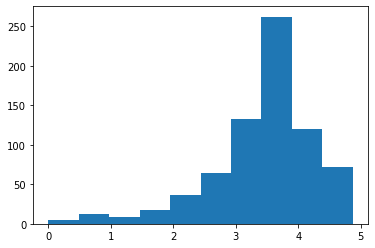

In [0]:
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("production graph")
plt.plot(data['power'])

data.plot(style='k.')  #scatter_plot
plt.show()

plt.hist(data.power)#histogram

#The values below lower extreme is not outlier because as per domain knowledge the lower values for solar power generation are during the sunrise and sunset.

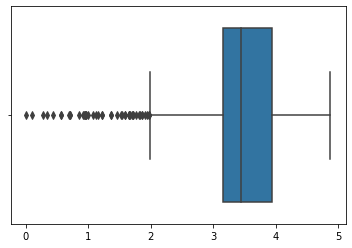

In [0]:
sns.boxplot(data) 

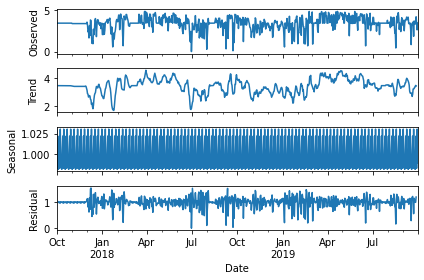

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
result.plot()
plt.show()

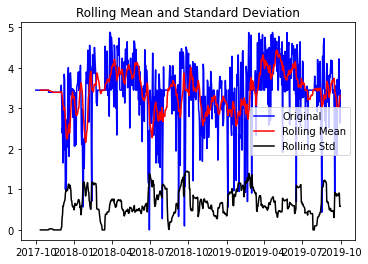

Results of dickey fuller test
Test Statistics                 -2.715752
p-value                          0.071352
No. of lags used                20.000000
Number of observations used    709.000000
critical value (1%)             -3.439607
critical value (5%)             -2.865625
critical value (10%)            -2.568945
dtype: float64


In [0]:
#ADF (Augmented Dickey-Fuller) Test to check data is stationary.
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['power'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data)

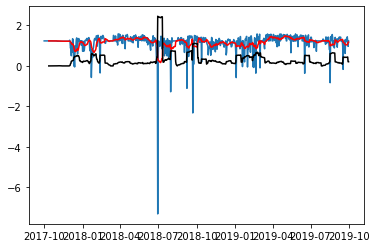

In [0]:
df_log = np.log(data)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

In [0]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

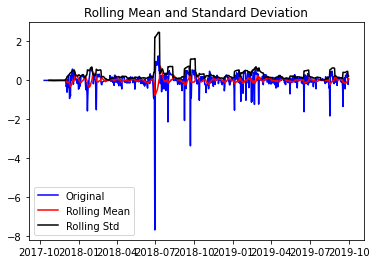

Results of dickey fuller test
Test Statistics               -1.236433e+01
p-value                        5.457162e-23
No. of lags used               1.000000e+01
Number of observations used    7.080000e+02
critical value (1%)           -3.439620e+00
critical value (5%)           -2.865631e+00
critical value (10%)          -2.568948e+00
dtype: float64


In [0]:
test_stationarity(df_log_moving_avg_diff)


In [0]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

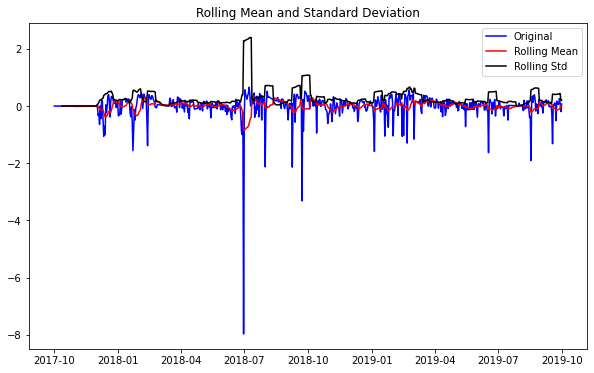

Results of dickey fuller test
Test Statistics               -1.647382e+01
p-value                        2.270104e-29
No. of lags used               1.000000e+00
Number of observations used    7.280000e+02
critical value (1%)           -3.439364e+00
critical value (5%)           -2.865518e+00
critical value (10%)          -2.568888e+00
dtype: float64


In [0]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

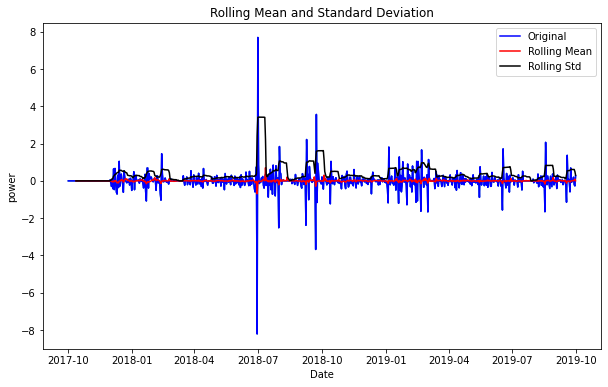

Results of dickey fuller test
Test Statistics               -1.123722e+01
p-value                        1.844559e-20
No. of lags used               1.900000e+01
Number of observations used    7.090000e+02
critical value (1%)           -3.439607e+00
critical value (5%)           -2.865625e+00
critical value (10%)          -2.568945e+00
dtype: float64


In [0]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("power")
plt.plot(df_log_diff)
#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

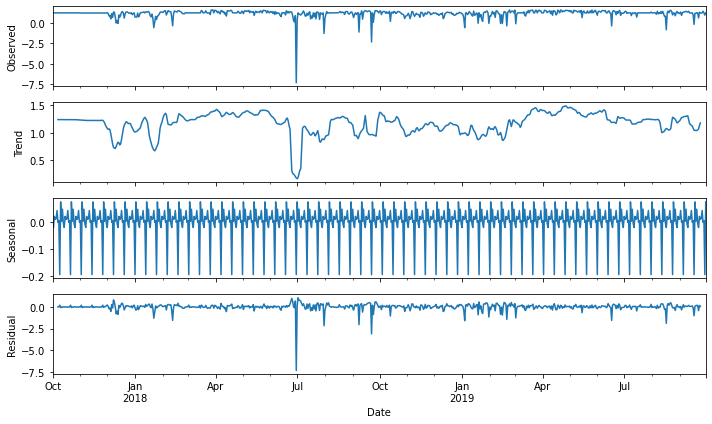

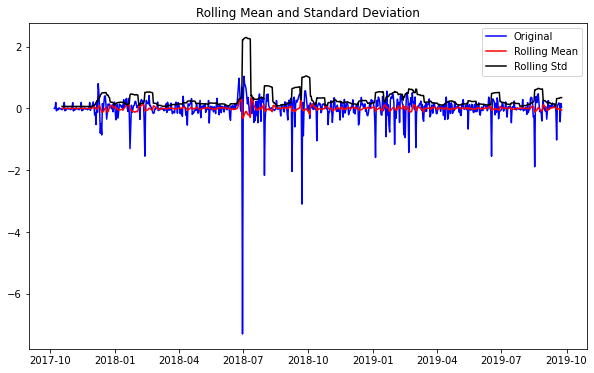

Results of dickey fuller test
Test Statistics               -1.266306e+01
p-value                        1.292357e-23
No. of lags used               1.900000e+01
Number of observations used    6.980000e+02
critical value (1%)           -3.439753e+00
critical value (5%)           -2.865690e+00
critical value (10%)          -2.568980e+00
dtype: float64


In [0]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()
trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


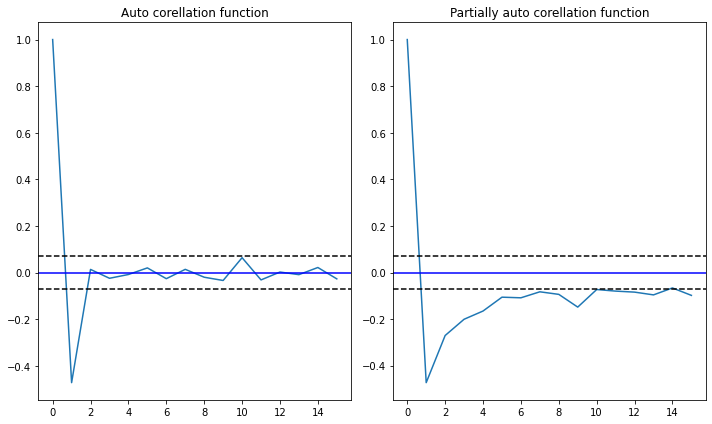

In [0]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')
#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()
#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RSS : 156.627178


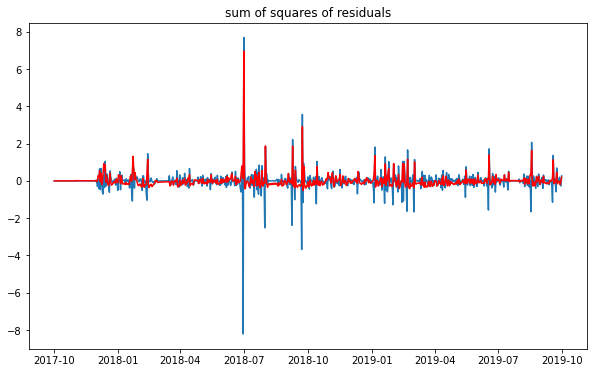

In [0]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["power"])**2))

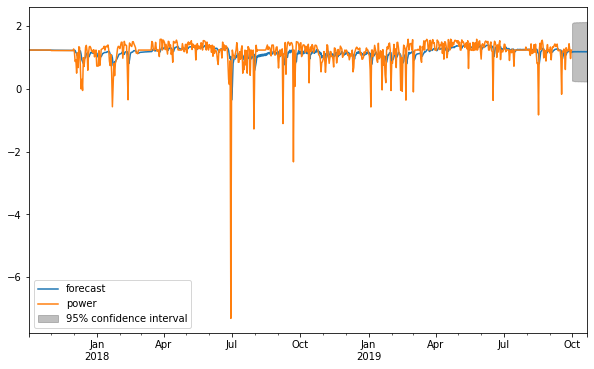

In [0]:
result_AR.plot_predict(1,750)
x=result_AR.forecast(steps=200)